# Linear Least Squares Problem and Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import lu_factor as LUdec

## Least Squares Problem

In [ ]:
# create an overdetermined linear system

m = 100 # number of equations
n = 10 # numer of variables

A = np.random.rand(m, n)

alpha_test = np.ones(n) # solution
y = A @ alpha_test
print('alpha test', alpha_test)

alpha test [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
print(f"A rank : {np.linalg.matrix_rank(A)}")

A rank : 10


### Normal Equations

In [ ]:
# Normal equations: (A.T@A)x = A.T@y
ATA = A.T@A
ATy = A.T@y

In [ ]:
# solve with LU factorization
lu, piv = LUdec(ATA)
alpha_lu = scipy.linalg.lu_solve((lu,piv), ATy)

print('alpha LU', alpha_lu)

alpha LU [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# solve with Cholesky factorization
L = scipy.linalg.cholesky(ATA, lower=True)
x = scipy.linalg.solve_triangular(L, ATy, lower=True)
alpha_chol = scipy.linalg.solve_triangular(L.T, x, lower=False)

print('alpha chol', alpha_chol)

alpha chol [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Singular Value Decomposition

In [ ]:
# solve with SVD
U, s, Vh = scipy.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

alpha_svd = np.zeros(s.shape)

for i in range(n):
  ui = U[:, i]
  vi = Vh[i, :]
  alpha_svd = alpha_svd + (np.dot(ui, y) * vi) / s[i]

print('alpha SVD', alpha_svd)

Shape of U: (100, 100)
Shape of s: (10,)
Shape of V: (10, 10)
alpha SVD [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Compare the errors of the three methods

In [ ]:
alpha_norm = np.linalg.norm(alpha_test, ord=2)

err_lu = np.linalg.norm(alpha_lu - alpha_test, ord=2) / alpha_norm
err_chol = np.linalg.norm(alpha_chol - alpha_test, ord=2) / alpha_norm
err_svd = np.linalg.norm(alpha_svd - alpha_test, ord=2) / alpha_norm

print(f"Error with LU: {err_lu}")
print(f"Error with Cholesky: {err_chol}")
print(f"Error with SVD: {err_svd}")

Error with LU: 7.312485447666923e-15
Error with Cholesky: 7.483018490147098e-15
Error with SVD: 2.2771754119223543e-15


## Polynomial Regression with LSQ

In [ ]:
# generate m samples of the function specified by case

def generate_samples(case, m):
  if case==0:
      x = np.linspace(-1,1,m)
      y = np.exp(x/2)
  elif case==1:
      x = np.linspace(-1,1,m)
      y = 1/(1+25*(x**2))
  elif case==2:
      x = np.linspace(0,2*np.pi,m)
      y = np.sin(x)+np.cos(x)

  return x, y

In [ ]:
# create the regresso matrix

def create_A(m, n, x):
  A = np.zeros((m, n+1))
  # the i-th element of the j-th row is x[j] ^ i
  for i in range(n+1):
    A[:, i] = x**i
  return A

In [ ]:
# calculate the coefficients of the approximating polynomial by solving the LSQ problem with SVD

def calculate_coeff(A, n, y):
  U, s, Vh = scipy.linalg.svd(A)
  coeff = np.zeros(n+1)

  for i in range(n+1):
    ui = U[:, i]
    vi = Vh[i, :]

    coeff = coeff + (np.dot(ui, y) * vi) / s[i]

  return coeff

In [ ]:
# plot the calculated polynomial and exact function

def plot_approx(x, y, m_plot, n, coeff, ax, case):
  # points of the exact function
  x_plot, y_plot = generate_samples(case, m_plot)

  # calculate polynomial values for the x_plots
  A_plot = np.zeros((m_plot, n+1))
  for i in range(n+1):
    A_plot[:, i] = x_plot ** i
  y_approximation = A_plot @ coeff

  # plot
  ax.plot(x, y, 'o')
  ax.plot(x_plot, y_plot, label='Exact function')
  ax.plot(x_plot, y_approximation, 'r', label='Approximation')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title(f'Polynomial approximation of degree {n}', fontsize=10)
  ax.grid()
  ax.legend()

In [ ]:
# print residual

def print_res(A, coeff, y, n):
  res = np.linalg.norm(y - A@coeff, ord=2)**2
  print(f'Residual for n = {n}: ', res)

In [ ]:
# numer of samples
m = 10

# how many points are used for the plit
m_plot = 100

# function 'names'
fs = [r"$e^{\frac{x}{2}}$", r"$\frac{1}{1+25x^{2}}$", r"$sin(x) + cos(x)$"]

# degree of the approximating polynomial
ns = [1, 2, 3, 5, 7]

Residual for n = 1:  0.02115086885728601
Residual for n = 2:  0.00016735466633672832
Residual for n = 3:  6.828919750540382e-07
Residual for n = 5:  2.183685712644631e-12
Residual for n = 7:  7.634952502238796e-19




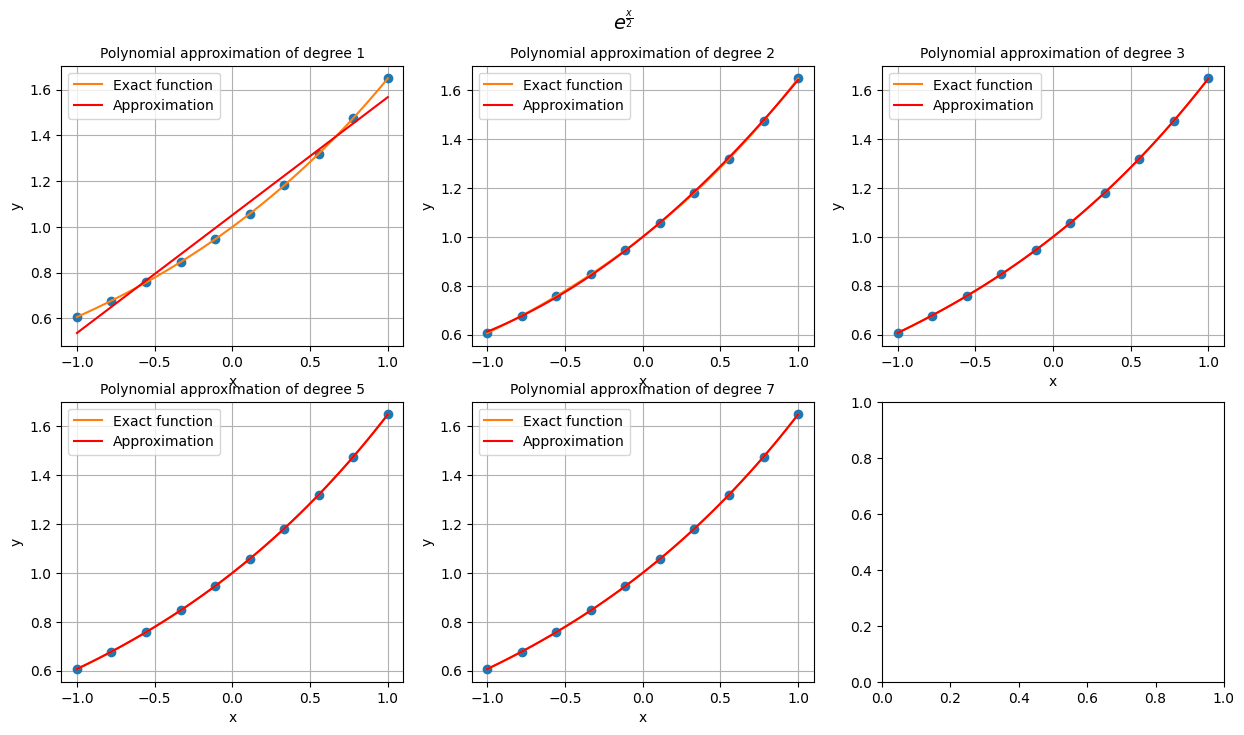





Residual for n = 1:  0.7258852388768753
Residual for n = 2:  0.33083303964287336
Residual for n = 3:  0.33083303964287325
Residual for n = 5:  0.1319024983506559
Residual for n = 7:  0.03760433990920481




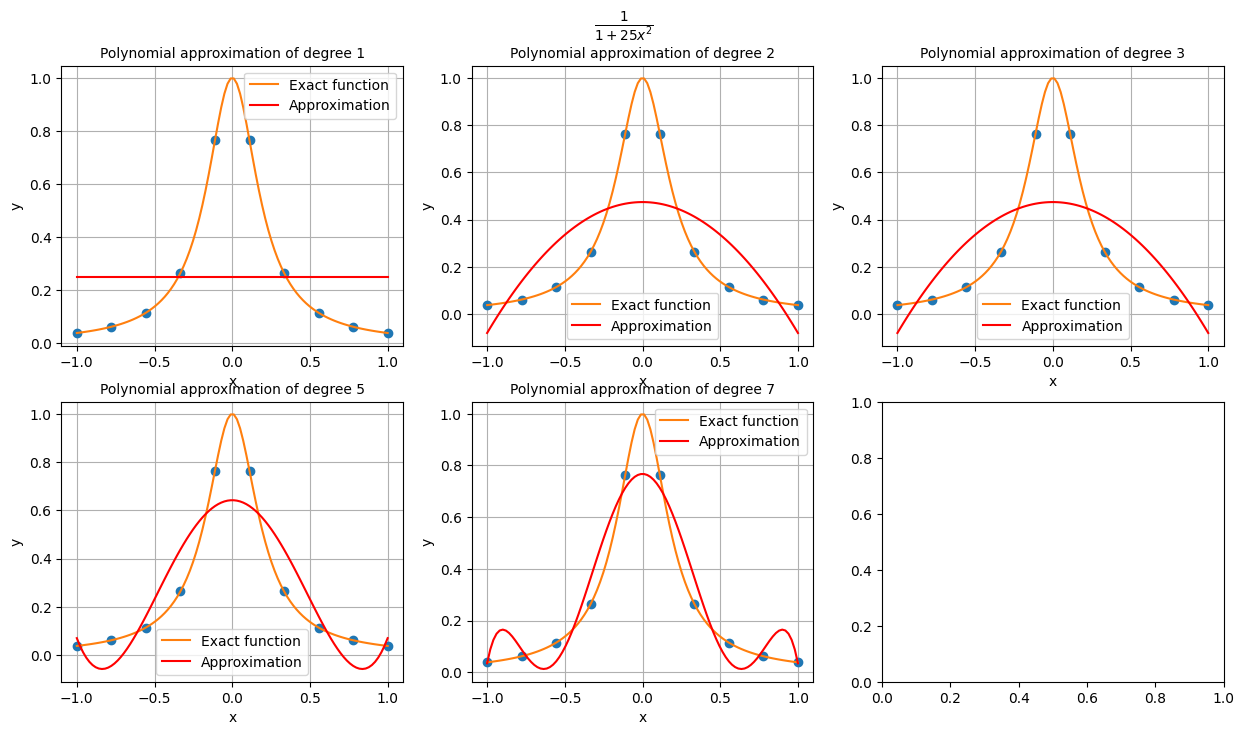





Residual for n = 1:  8.047153921807707
Residual for n = 2:  3.2230927625249945
Residual for n = 3:  0.6412338289262144
Residual for n = 5:  0.0043026143145294335
Residual for n = 7:  2.8598525656766422e-06




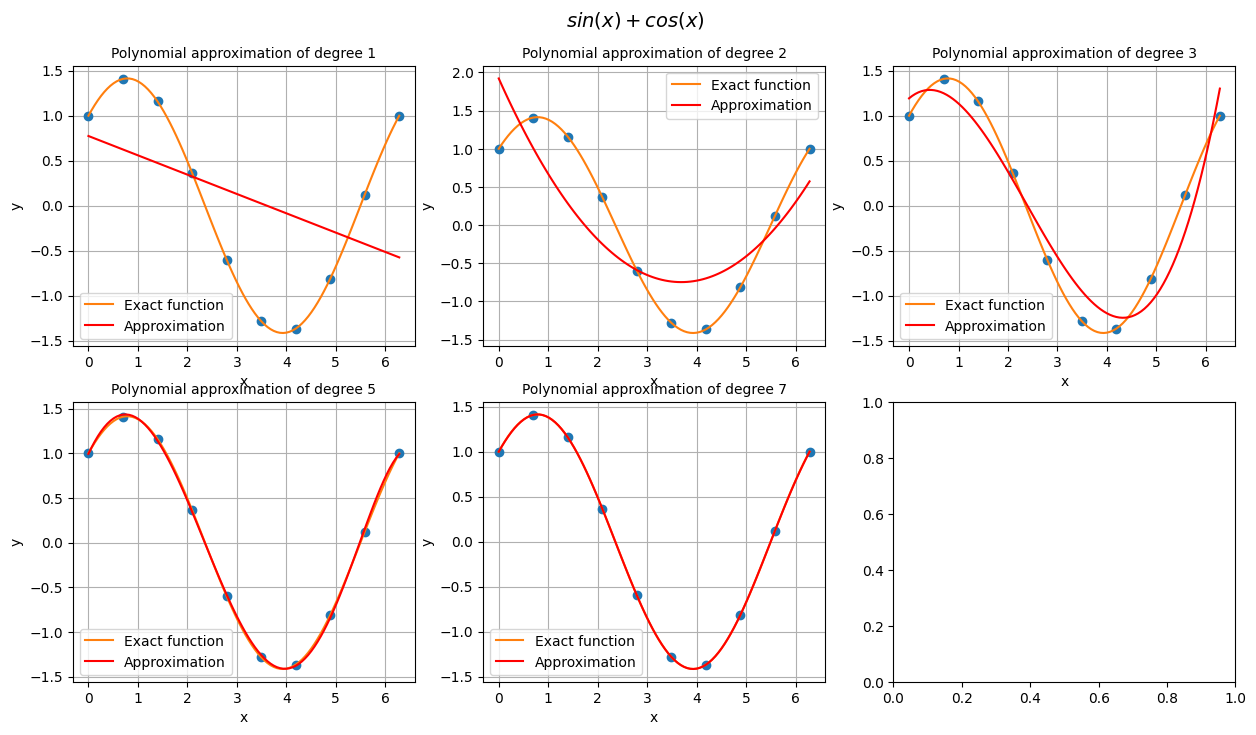

In [ ]:
# approximate all the functions using polynomials of increasing degree

for case in range(len(fs)):
  # create plot for this function and add title
  fig, axs = plt.subplots(2, 3, figsize=(15, 8))
  fig.suptitle(fs[case], fontsize=14, y=0.95)

  # solve the regression problem
  for k in range(len(ns)):
    n = ns[k]
    x, y = generate_samples(case, m)
    A = create_A(m, n, x)
    alpha_svd = calculate_coeff(A, n, y)
    print_res(A, alpha_svd, y, n)
    plot_approx(x, y, m_plot, n, alpha_svd, axs[int(k/3), k%3], case)

  print("\n")
  plt.show()
  print("\n\n\n")